In [160]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk import tokenize
from string import punctuation

import unidecode

import re


In [161]:
data = pd.read_csv('data/dados_tratados.csv', sep = '~', index_col=0 )
data.head()

,orgao_julgador,process_type,decision_text,decision_label,ementa_text,tamanho_ementa
0,3ª Câmara Cível,APL,RECURSO CONHECIDO E PROVIDO,yes,DIREITO PROCESSUAL CIVIL E ADMINISTRATIVO. APE...,670
1,Câmara Criminal,APL,"5 Recurso conhecido e parcialmente provido, r...",partial,APELAÇÃO CRIMINAL. PENAL. PROCESSO PENAL. ROUB...,1759
2,2ª Câmara Cível,APL,RECURSO CONHECIDO E PROVIDO,yes,APELAÇÃO CÍVEL. AÇÃO DE BUSCA E APREENSÃO. ALI...,384
3,3ª Câmara Cível,APL,RECURSO CONHECIDO E PROVIDO EM PARTE,partial,APELAÇÃO CÍVEL. AÇÃO DE INDENIZAÇÃO POR DANOS ...,859
4,1ª Câmara Cível,APL,RECURSO CONHECIDO E NÃO PROVIDO,no,DIREITO ADMINISTRATIVO. URV. APELAÇÃO CÍVEL EM...,2963


# Remover pontuacao, acentuacao e stopwords

In [162]:
def remover_stopwords_pontuacao_acentuacao(data):
    # Recebe um dataframe e retorna uma lista dos dados sem stopwords e sem pontuação e acentuacao
    pontuacao = list()

    for p in punctuation:
        pontuacao.append(p)

    stopwords = nltk.corpus.stopwords.words("portuguese")
    frases_processadas = list()

    pontuacao_stopwords = stopwords + pontuacao

    frases_processadas = list()
    for d in data:
        nova_frase = list()
        token_pontuacao = tokenize.WordPunctTokenizer()
        palavras = token_pontuacao.tokenize(unidecode.unidecode(d.lower()))

        for palavra in palavras:
            if palavra not in pontuacao_stopwords:
                nova_frase.append(palavra)

        frases_processadas.append(' '.join(nova_frase))

    return frases_processadas

In [163]:
data['tratamento'] = remover_stopwords_pontuacao_acentuacao(data['ementa_text'])

In [164]:
data.head()

,orgao_julgador,process_type,decision_text,decision_label,ementa_text,tamanho_ementa,tratamento
0,3ª Câmara Cível,APL,RECURSO CONHECIDO E PROVIDO,yes,DIREITO PROCESSUAL CIVIL E ADMINISTRATIVO. APE...,670,direito processual civil administrativo apelac...
1,Câmara Criminal,APL,"5 Recurso conhecido e parcialmente provido, r...",partial,APELAÇÃO CRIMINAL. PENAL. PROCESSO PENAL. ROUB...,1759,apelacao criminal penal processo penal roubo m...
2,2ª Câmara Cível,APL,RECURSO CONHECIDO E PROVIDO,yes,APELAÇÃO CÍVEL. AÇÃO DE BUSCA E APREENSÃO. ALI...,384,apelacao civel acao busca apreensao alienacao ...
3,3ª Câmara Cível,APL,RECURSO CONHECIDO E PROVIDO EM PARTE,partial,APELAÇÃO CÍVEL. AÇÃO DE INDENIZAÇÃO POR DANOS ...,859,apelacao civel acao indenizacao danos materiai...
4,1ª Câmara Cível,APL,RECURSO CONHECIDO E NÃO PROVIDO,no,DIREITO ADMINISTRATIVO. URV. APELAÇÃO CÍVEL EM...,2963,direito administrativo urv apelacao civel acao...


# Selecionar todos os dados que possuem a palavra art

In [165]:
def contem_art(data):
    nova_frase = []
    for frase in data:
        if ' art ' in frase:
            nova_frase.append(frase)
    return nova_frase


In [166]:
frases_com_art = contem_art(data['tratamento'])

In [167]:
len(frases_com_art)

3912

# Remover os dados repetidos

In [168]:
def remove_repeticao(data):
    array_de_frases = []
    array_de_verificacao = []
    for frase in data:
        mistura = ''.join(frase.split(' ')[:25])        
        if mistura not in array_de_verificacao and len(mistura) != 0:
            array_de_verificacao.append(mistura)
            array_de_frases.append(frase)
    return array_de_frases
    
    

In [169]:
frases_sem_repeticao = remove_repeticao(frases_com_art)

In [170]:
len(frases_sem_repeticao)

1660

In [171]:
df = pd.DataFrame(frases_sem_repeticao, columns = [['ementa_text']])

In [172]:
df.head()

,ementa_text
0,direito processual civil administrativo apelac...
1,apelacao criminal penal processo penal roubo m...
2,apelacao civel acao busca apreensao alienacao ...
3,direito administrativo urv apelacao civel acao...
4,apelacao civel direito constitucional processu...


# Nuvem de palavras

In [173]:
def nuvem_de_palavras(dataframe):
#     Recebe uma coluna de um dataframe com frases e exibe uma núvem de palavras
    %matplotlib inline
    
    todas_frases = ''
    
    lista_frases = dataframe.values
    for frase in lista_frases:
        todas_frases += ' '.join(frase)
    nuvem_palavras = WordCloud(width = 1200, 
                               height = 800,
                               max_font_size = 110,
                               collocations = False).generate(todas_frases)
    plt.axis("off")
    plt.figure(figsize = (20,15))
    plt.imshow(nuvem_palavras, interpolation="bilinear")

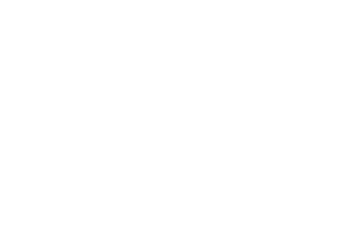

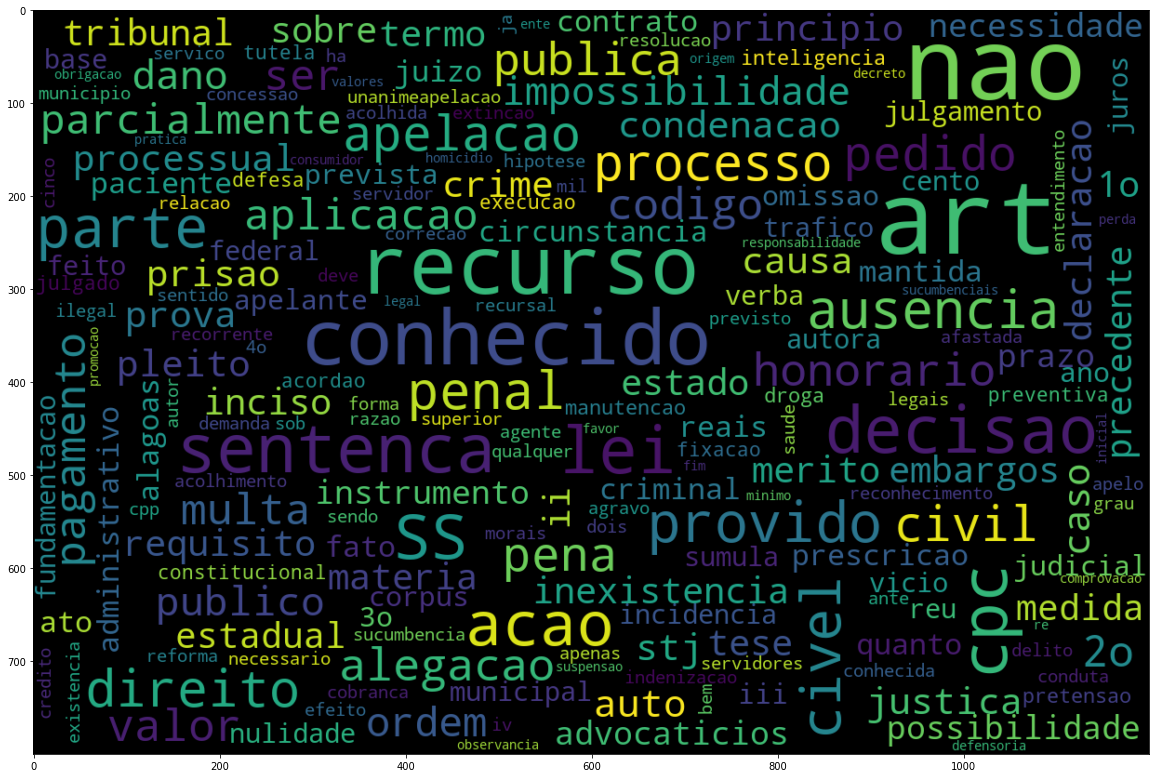

In [174]:
nuvem_de_palavras(df[['ementa_text']])

# Frequência

In [175]:
def frequencia_palavras(dataframe):
    todas_frases = ''
    
    lista_frases = dataframe.values
    for frase in lista_frases:
        todas_frases += ' '.join(frase)

    token_espaco = tokenize.WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(todas_frases)

    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                 "Frequencia": list(frequencia.values())})
    return df_frequencia

In [176]:
freq = frequencia_palavras( df[['ementa_text']] )
freq.head()


,Palavra,Frequencia
0,direito,659
1,processual,374
2,civil,631
3,administrativo,259
4,apelacao,662


# Seleção das palavras 

In [177]:

# for palavra in freq.nlargest(columns = 'Frequencia', n = 1000).values:
#     print(palavra)

In [178]:
palavras_selecionadas = ["prisao", "crime", "contrato", "indenizacao", "tutela", "saude", "consumidor", "trafico", "cobranca", "reforma", "drogas", "habeas", "homicidio", "cautelar", "servidor", "constrangimento", "servico", "seguranca", "posse", "concurso", "razoabilidade", "roubo", "violacao", "vicios", "contradicao", "provimento", "militar", "probatorio", "financeira", "flagrante", "apreensao", "cargo", "administracao", "mandado", "prestacao", "cartao", "autoral", "social", "policial", "imovel", "banco", "remuneracao", "prejuizo", "carreira", "veiculo", "taxa", "legalidade", "ofensa", "natureza", "associacao", "empresa", "absolvicao", "salario", "remessa", "devedor", "participacao", "aumento", "custodia", "divida", "anulacao"]

In [179]:
len(palavras_selecionadas)

60

# Dados com palavras selecionadas

In [180]:
def Frases_selecionadas(data, palavras_selecionadas):
    
    array_de_frases = []
        
    for frase in data.values:
        for palavra in frase[0].split(' '):
            if palavra in palavras_selecionadas:
                array_de_frases.append(frase)
                break
    return array_de_frases
    

In [181]:
lista_selecionado = Frases_selecionadas(df[['ementa_text']], palavras_selecionadas)

In [182]:
len(lista_selecionado)

1470

In [183]:
df_selecionado = pd.DataFrame(lista_selecionado, columns = [['ementa_text']])

In [184]:
df_selecionado.head()

,ementa_text
0,direito processual civil administrativo apelac...
1,apelacao criminal penal processo penal roubo m...
2,apelacao civel acao busca apreensao alienacao ...
3,direito administrativo urv apelacao civel acao...
4,apelacao civel acao adimplemento contratual c ...


# Eliminar todas as palavras que não seja as selecionadas

In [185]:
def dados_palavras_selecionadas(data):
    array_de_frases = list()
    for frase in data.values:
        array_de_palavras = []
        for palavra in frase[0].split(' '):
            if palavra in palavras_selecionadas:
                array_de_palavras.append(palavra)
        if(len(array_de_palavras) == 0):
            array_de_frases.append(' ')
        else:
            array_de_frases.append(' '.join(array_de_palavras))
    return pd.Series(array_de_frases)
            

In [186]:
df_selecionado['palavras_selecionadas'] = dados_palavras_selecionadas(df_selecionado[['ementa_text']])

In [187]:
df_selecionado.head()

,ementa_text,palavras_selecionadas
0,direito processual civil administrativo apelac...,militar
1,apelacao criminal penal processo penal roubo m...,roubo concurso crime concurso crime roubo crim...
2,apelacao civel acao busca apreensao alienacao ...,apreensao divida
3,direito administrativo urv apelacao civel acao...,servidor salario servidor carreira carreira ca...
4,apelacao civel acao adimplemento contratual c ...,cobranca autoral


In [188]:
df_selecionado.shape

(1470, 2)

# Separa os artigos

In [189]:
def separa_artigos(df):
    array_artigos = list()
    for i in range(len(df.values)):
        text = df.values[i][0]
        find_art = re.findall('art\s*\d+', text)
        if len(find_art) > 0:
            array_artigos.append(find_art)
        else:
            array_artigos.append([''])
    return array_artigos

In [190]:
df_selecionado['artigos'] = separa_artigos(df_selecionado[['ementa_text']])

In [191]:
df_selecionado.head()

,ementa_text,palavras_selecionadas,artigos
0,direito processual civil administrativo apelac...,militar,"[art 1, art 487]"
1,apelacao criminal penal processo penal roubo m...,roubo concurso crime concurso crime roubo crim...,[art 157]
2,apelacao civel acao busca apreensao alienacao ...,apreensao divida,[art 3]
3,direito administrativo urv apelacao civel acao...,servidor salario servidor carreira carreira ca...,"[art 942, art 85, art 98]"
4,apelacao civel acao adimplemento contratual c ...,cobranca autoral,[art 487]


# Vetorizar

In [192]:
def vetorizar_palavras(dataframe):
    # Recebe uma coluna de um dataframe de frases e retorna um dataframe vetorizado
    
    modelo = CountVectorizer()
    bag = modelo.fit_transform(dataframe)
    new_df = pd.SparseDataFrame(bag,
                     columns = modelo.get_feature_names())
    new_df.fillna(0.0, inplace = True)
    return new_df

In [193]:
lista = list()
for frase in df_selecionado[['palavras_selecionadas']].values:
    lista.append(frase[0])
vetor = pd.Series(lista)

dados_vetorizados = pd.DataFrame(vetorizar_palavras(vetor))

/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  import sys
/home/glauberc/.local/lib/python3.6/site-packages/pandas/core/sparse/frame.py:257: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_index=BlockIndex(N, blocs, blens),


In [194]:
dados_vetorizados.head()

,absolvicao,administracao,anulacao,apreensao,associacao,aumento,autoral,banco,cargo,carreira,...,seguranca,servico,servidor,social,taxa,trafico,tutela,veiculo,vicios,violacao
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
dados_vetorizados.shape

(1470, 60)

In [196]:
dados_vetorizados['artigos'] = df_selecionado[['artigos']]

In [197]:
dados_vetorizados.head()

,absolvicao,administracao,anulacao,apreensao,associacao,aumento,autoral,banco,cargo,carreira,...,servico,servidor,social,taxa,trafico,tutela,veiculo,vicios,violacao,artigos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[art 1, art 487]"
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[art 157]
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[art 3]
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[art 942, art 85, art 98]"
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[art 487]


In [198]:
dados_vetorizados.to_csv('data/palavras-selecionadas.csv')

In [210]:
df_selecionado[['ementa_text']].iloc[893].values

array(['penal processual penal tribunal juri decisao pronuncia imputa reu pratica tentativa homicidio qualificado art 121 SS 2o iv art 14 ii cp recurso sentido estrito irresignacao defensiva pretendida despronuncia ausencia indicios suficientes prolacao decisao pronuncia improcedencia pronuncia lastreada declaracoes vitima sobrevivente esposo testemunhas presenciaram eventos supostamente delitivos elementos prova suficientes amparar decisao recorrida parecer procuradoria justica criminal nesse sentido in dubio pro societate recurso conhecido improvido i havendo indicios suficientes amparar tese acusatoria basta manutencao sentenca pronuncia mero juizo admissibilidade permitir causa chegue conhecimento juri somente jurados compete valorar definitivamente provas concluindo procedencia nao pretensao condenatoria crimes dolosos contra vida ii declaracoes prestadas vitima sobrevivente marido outras testemunhas presenciaram cena delitiva dao conta provavel intencao homicida agente visando ac